<a href="https://colab.research.google.com/github/nthrsn/deep_learning/blob/assignment-1/02_activities/assignments/assignment_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Image Classification with ImageNet

In this assignment, you will be asked to develop a convolutional neural network (CNN) to classify images from the CIFAR-100 dataset. At each step, you'll be guided through the process of developing a model architecture to solve a problem. Your goal is to create a CNN that attains at least 55% accuracy on the validation set.

### The CIFAR-100 Dataset

The [CIFAR-100 dataset](https://www.cs.toronto.edu/~kriz/cifar.html) consists of 60000 32x32 colour images in 100 classes, with 600 images per class. There are 50000 training images and 10000 test images. The dataset is divided into five training batches and one test batch, each with 10000 images. The test batch contains exactly 1000 randomly-selected images from each class. The training batches contain the remaining images in random order, but some training batches may contain more images from one class than another. Between them, the training batches contain exactly 500 images from each class.

### Tools

You will use Keras with TensorFlow to develop your CNN. For this assignment, it's strongly recommended that you use a GPU to accelerate your training, or else you might find it difficult to train your network in a reasonable amount of time. If you have a computer with a GPU that you wish to use, you can follow the [TensorFlow instructions](https://www.tensorflow.org/install/) for installing TensorFlow with GPU support. Otherwise, you can use [Google Colab](https://colab.research.google.com/) to complete this assignment. Colab provides free access to GPU-enabled machines. If you run into any issues, please contact us as soon as possible so that we can help you resolve them.

## Task 1: Data Exploration and Preprocessing (Complete or Incomplete)
### 1a: Load and Explore the Dataset
- Use the code below to download the dataset.
- Explore the dataset: examine the shape of the training and test sets, the dimensions of the images, and the number of classes. Show a few examples from the training set.

In [2]:
from keras.datasets import cifar100

# Load the CIFAR-100 dataset
(x_train, y_train), (x_test, y_test) = cifar100.load_data(label_mode='fine')

169001437/169001437 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
class_names = [
    "apple", "aquarium_fish", "baby", "bear", "beaver", "bed", "bee", "beetle", "bicycle", "bottle",
    "bowl", "boy", "bridge", "bus", "butterfly", "camel", "can", "castle", "caterpillar", "cattle",
    "chair", "chimpanzee", "clock", "cloud", "cockroach", "couch", "crab", "crocodile", "cup", "dinosaur",
    "dolphin", "elephant", "flatfish", "forest", "fox", "girl", "hamster", "house", "kangaroo", "keyboard",
    "lamp", "lawn_mower", "leopard", "lion", "lizard", "lobster", "man", "maple_tree", "motorcycle", "mountain",
    "mouse", "mushroom", "oak_tree", "orange", "orchid", "otter", "palm_tree", "pear", "pickup_truck", "pine_tree",
    "plain", "plate", "poppy", "porcupine", "possum", "rabbit", "raccoon", "ray", "road", "rocket",
    "rose", "sea", "seal", "shark", "shrew", "skunk", "skyscraper", "snail", "snake", "spider",
    "squirrel", "streetcar", "sunflower", "sweet_pepper", "table", "tank", "telephone", "television", "tiger", "tractor",
    "train", "trout", "tulip", "turtle", "wardrobe", "whale", "willow_tree", "wolf", "woman", "worm"
]

In [4]:
print("Training set shape:", x_train.shape)  # (50000, 32, 32, 3) - 50,000 32x32 training images with 3-colour channels (RGB)
print("Test set shape:", x_test.shape)      # (10000, 32, 32, 3) - 10,000 32x32 test images in RGB channel

print("Image dimensions:", x_train.shape[1:])  # width by height, 3-channels (RGB image)
print("Number of classes:", len(set(y_train.flatten())))  # 100 unique labels


Training set shape: (50000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Image dimensions: (32, 32, 3)
Number of classes: 100


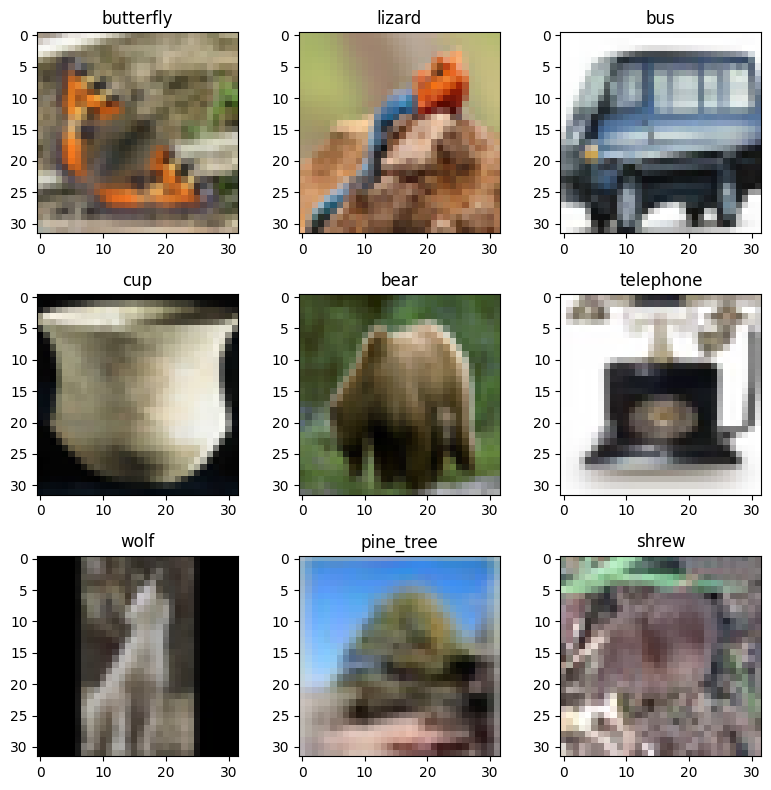

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Select 9 random images
random_indices = np.random.choice(x_train.shape[0], 9, replace=False)

# Create a 3x3 grid of images
fig, axes = plt.subplots(3, 3, figsize=(8, 8))
axes = axes.flatten()

for i, idx in enumerate(random_indices):
    img = x_train[idx]
    label = class_names[y_train[idx][0]]  # Convert label index to class name
    axes[i].imshow(img)
    axes[i].set_title(label)
    axes[i].axis('on')

plt.tight_layout()
plt.show()

### 1b: Data Preprocessing
- With the data downloaded, it's time to preprocess it. Start by normalizing the images so that they all have pixel values in the range [0, 1].
- Next, convert the labels to one-hot encoded vectors.
- Finally, split the training set into training and validation sets. Use 80% of the training set for training and the remaining 20% for validation.

In [6]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Normalize pixel values to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convert labels to one-hot encoding
num_classes = 100
#print(f'Before one-hot encoding: {y_train[0]}')
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)
#print(f'After one-hot encoding: {y_train[0]}')

# Split training set into training (80%) and validation (20%)
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Display dataset shape after preprocessing
print("Training set shape:", x_train.shape)
print("Validation set shape:", x_val.shape)
print("Test set shape:", x_test.shape)
print("Number of classes:", num_classes)

Training set shape: (40000, 32, 32, 3)
Validation set shape: (10000, 32, 32, 3)
Test set shape: (10000, 32, 32, 3)
Number of classes: 100


## Task 2: Model Development (Complete or Incomplete)
### Task 2a: Create a Baseline CNN Model
- Design a CNN architecture. Your architecture should use convolutional layers, max pooling layers, and dense layers. You can use any number of layers, and you can experiment with different numbers of filters, filter sizes, strides, padding, etc. The design doesn't need to be perfect, but it should be unique to you.
- Print out the model summary.

In [28]:
# from tensorflow.keras import layers, models

model = models.Sequential()

# First convolutional block
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Third convolutional block
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='softmax'))  # 100 classes for classification

model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 857,348 (3.27 MB)

 Trainable params: 857,348 (3.27 MB)

 Non-trainable params: 0 (0.00 B)

### Task 2b: Compile the model

- Select an appropriate loss function and optimizer for your model. These can be ones we have looked at already, or they can be different.
- Briefly explain your choices (one or two sentences each).
- <b>Loss function:</b> categorical_crossentropy - this loss function is ideal for one-hot encoded labels and helps the model learn to differentiate between the 100 classes
- <b>Optimizer:</b> Adam (Adaptive Moment Estimation) optimizer (used in lecture) appropriate for image dataset and because it learns quickly and adjusts well to different image patterns, popular choice for CNNs

In [29]:
from tensorflow.keras.optimizers import Adam

# Compile  model
model.compile(
    loss = "categorical_crossentropy",
    optimizer = Adam(learning_rate = 0.001),
    metrics=["accuracy"]
)

# Print summary
model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_25 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_26 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_27 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_13 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_28 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_29 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_12 (Dense)                     │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 100)                 │          12,900 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 857,348 (3.27 MB)

 Trainable params: 857,348 (3.27 MB)

 Non-trainable params: 0 (0.00 B)

## Task 3: Model Training and Evaluation (Complete or Incomplete)
### Task 3a: Train the Model

- Train your model for an appropriate number of epochs. Explain your choice of the number of epochs used - you can change this number before submitting your assignment.
- Use a batch size of 32.
- Use the validation set for validation.

In [30]:
history = model.fit(
    x_train,  # Training data
    y_train,  # Training labels
    epochs=50,  # 50 epochs for better learning
    batch_size=32,  # Number of samples per batch
    validation_data=(x_test, y_test)
)


Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.0093 - loss: 4.6059 - val_accuracy: 0.0100 - val_loss: 4.6052
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 7s 6ms/step - accuracy: 0.0099 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6053
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0102 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6054
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.0100 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6054
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.0103 - loss: 4.6054 - val_accuracy: 0.0100 - val_loss: 4.6054
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0095 - loss: 4.6055 - val_accuracy: 0.0100 - val_loss: 4.6054
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0090 - loss: 4.6052 - val_accuracy: 0.0100 - val_loss: 4.6054
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0111 - loss: 4.60

### Task 3b: Accuracy and other relevant metrics on the test set

- Report the accuracy of your model on the test set.
- While accuracy is a good metric, there are many other ways to numerically evaluate a model. Report at least one other metric, and explain what it measures and how it is calculated.

- <b>Accuracy:</b> model correctly classified only 1% of the test samples
- <b>Other metric:</b> F1 Score
- <b>Reason for selection:</b> It's helpful for image classification when classes may be imbalanced. This metric balances precision and recall, helping avoid false positives and false negatives equally
- <b>Value of metric:</b> 2%
- <b>Interpretation of metric value:</b> Very low - model is not performing well.

In [31]:
from sklearn.metrics import f1_score
import numpy as np

# Assess model performance on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Set Accuracy: {100 * np.round(test_accuracy, 4)}%")

# Obtain model predictions on the test data
y_pred = model.predict(x_test)

# Convert one-hot encoded labels to class indices
y_pred_labels = np.argmax(y_pred, axis=1)
y_actual_labels = np.argmax(y_test, axis=1)

# Compute the F1 score (=averaged across all classes)
f1 = f1_score(y_actual_labels, y_pred_labels, average='macro')
print(f"F1 Score: {100 * np.round(f1, 4)}%")


Test Set Accuracy: 1.0%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
F1 Score: 0.02%


### Task 3c: Visualize the model's learning

- Plot the training accuracy and validation accuracy with respect to epochs.
- Select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.
- Briefly discuss the results. What do the plots show? Do the results make sense? What do the classification probabilities indicate?

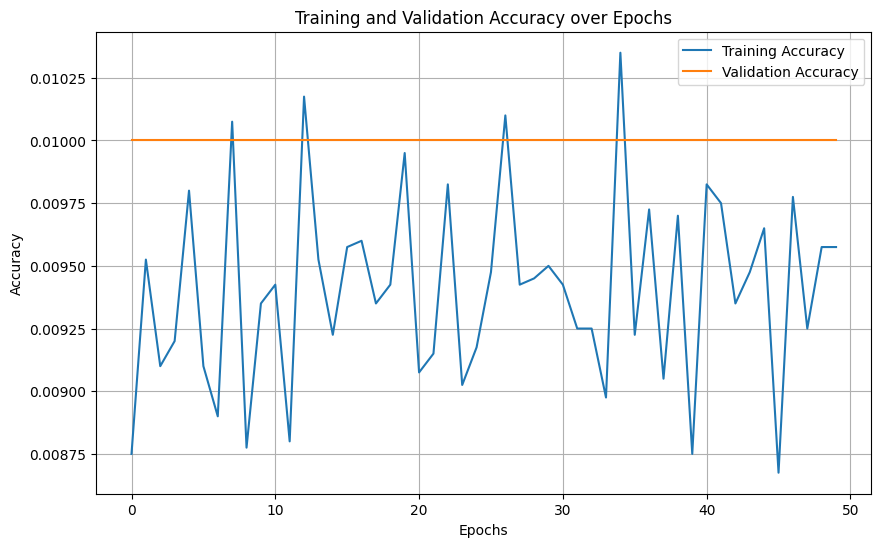

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


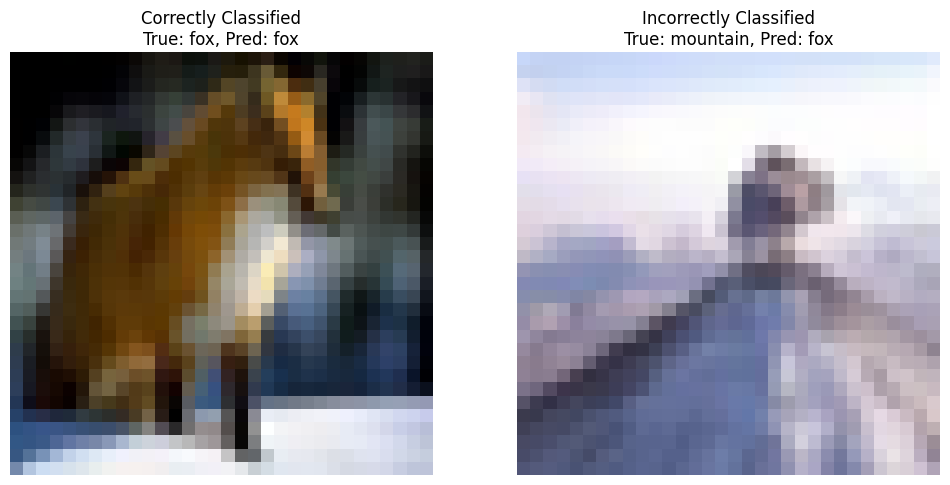

In [33]:
# Generate predictions for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# for correctly identified image
correct_indices = np.where(y_pred_classes == y_true)[0]
correct_index = correct_indices[0]

# for incorrectly identified image
incorrect_indices = np.where(y_pred_classes != y_true)[0]
incorrect_index = incorrect_indices[0]

# Plot the selected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f"Correctly Classified\nTrue: {class_names[y_true[correct_index]]}, Pred: {class_names[y_pred_classes[correct_index]]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f"Incorrectly Classified\nTrue: {class_names[y_true[incorrect_index]]}, Pred: {class_names[y_pred_classes[incorrect_index]]}")
plt.axis('off')

plt.show()

From the plot:

*   **Training Accuracy** is fluctuating too much, and the model is struggling to learn
*   **Validation Accuracy** is flat at 1%: This confirms that the model is not improving on unseen data, may be caused by class imbalance, label mismatch, or a learning problem and requires a review to fix



## Task 4: Model Enhancement (Complete or Incomplete)
### Task 4a: Implementation of at least one advanced technique

- Now it's time to improve your model. Implement at least one technique to improve your model's performance. You can use any of the techniques we have covered in class, or you can use a technique that we haven't covered. If you need inspiration, you can refer to the [Keras documentation](https://keras.io/).
- Explain the technique you used and why you chose it.
- If you used a technique that requires tuning, explain how you selected the values for the hyperparameters.

In [19]:
from tensorflow.keras import layers, models

model = models.Sequential()

# First convolutional block
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Conv2D(32, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Second convolutional block
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Third convolutional block
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Conv2D(128, (3,3), activation='relu', padding='same'))
model.add(layers.MaxPooling2D((2,2)))

# Flatten and fully connected layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Dropout(0.5))  # Dropout for regularization
model.add(layers.Dense(128, activation='relu'))
model.add(layers.BatchNormalization())  # Added batch normalization
model.add(layers.Dropout(0.3))
model.add(layers.Dense(100, activation='softmax'))  # 100 classes for classification

model.summary()


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_18 (Conv2D)                   │ (None, 32, 32, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 32)          │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 32, 32, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 16, 16, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 16, 16, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 16, 16, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_21 (Conv2D)                   │ (None, 16, 16, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 8, 8, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_22 (Conv2D)                   │ (None, 8, 8, 128)           │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 8, 8, 128)           │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_23 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 4, 4, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 2048)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 256)                 │         524,544 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │              

 Total params: 859,780 (3.28 MB)

 Trainable params: 858,564 (3.28 MB)

 Non-trainable params: 1,216 (4.75 KB)

### Task 4b: Evaluation of the enhanced model

- Re-train your model using the same number of epochs as before.
- Compare the accuracy and other selected metric on the test set to the results you obtained before.
- As before, plot the training accuracy and validation accuracy with respect to epochs, and select an image that the model correctly classified in the test set, and an image that the model incorrectly classified in the test set. Plot the images and report the model's classification probabilities for each.

In [22]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(
    loss="categorical_crossentropy",
    optimizer=Adam(learning_rate=0.001),
    metrics=["accuracy"]
)


history = model.fit(
    x_train,  # Training data
    y_train,  # Training labels
    epochs=50,  # 50 epochs for better learning
    batch_size=32,  # Number of samples per batch
    validation_data=(x_test, y_test)
)

Epoch 1/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.1138 - loss: 3.7859 - val_accuracy: 0.1736 - val_loss: 3.3856
Epoch 2/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.2101 - loss: 3.1600 - val_accuracy: 0.2640 - val_loss: 2.9343
Epoch 3/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.2938 - loss: 2.7505 - val_accuracy: 0.2690 - val_loss: 2.9453
Epoch 4/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3377 - loss: 2.5122 - val_accuracy: 0.3679 - val_loss: 2.3714
Epoch 5/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.3847 - loss: 2.2849 - val_accuracy: 0.4089 - val_loss: 2.2288
Epoch 6/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4228 - loss: 2.1121 - val_accuracy: 0.4219 - val_loss: 2.2425
Epoch 7/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.4543 - loss: 1.9694 - val_accuracy: 0.4434 - val_loss: 2.0793
Epoch 8/50
1250/1250 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.4874 - loss: 1.8283 

In [23]:
from sklearn.metrics import f1_score
import numpy as np

# Assess model performance on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f"Test Set Accuracy: {100 * np.round(test_accuracy, 4)}%")

# Obtain model predictions on the test data
y_pred = model.predict(x_test)

# Convert one-hot encoded labels to class indices
y_pred_labels = np.argmax(y_pred, axis=1)
y_actual_labels = np.argmax(y_test, axis=1)

# Compute the F1 score (=averaged across all classes)
f1 = f1_score(y_actual_labels, y_pred_labels, average='macro')
print(f"F1 Score: {100 * np.round(f1, 4)}%")

Test Set Accuracy: 44.519999999999996%
313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
F1 Score: 44.36%


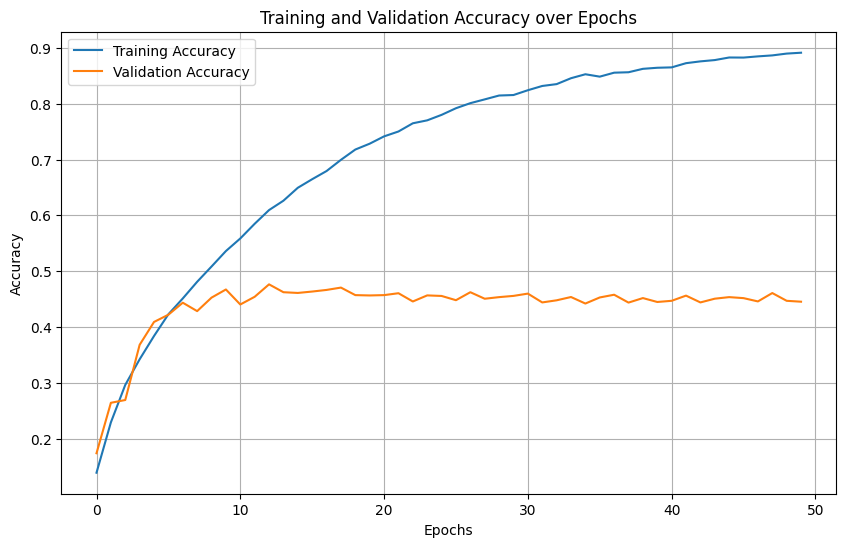

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy over Epochs')
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


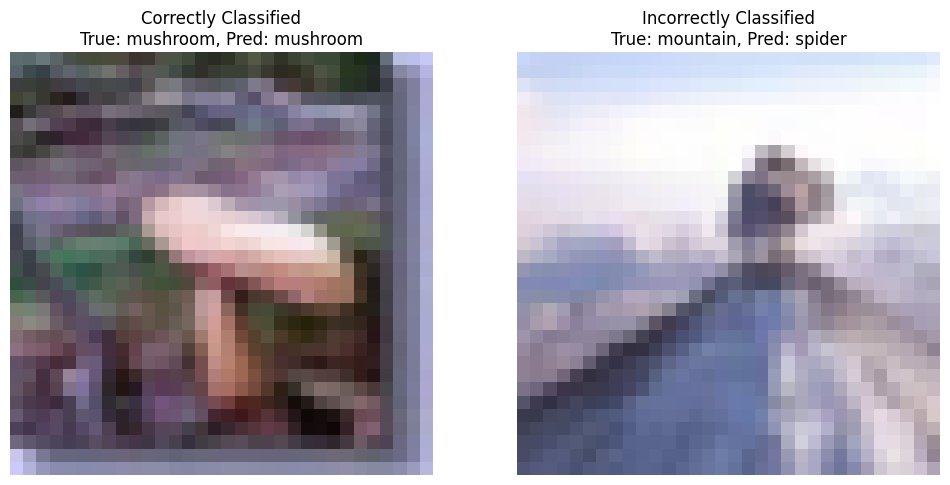

In [27]:
# Generate predictions for test set
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# for correctly identified image
correct_indices = np.where(y_pred_classes == y_true)[0]
correct_index = correct_indices[0]

# for incorrectly identified image
incorrect_indices = np.where(y_pred_classes != y_true)[0]
incorrect_index = incorrect_indices[0]

# Plot the selected images
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(x_test[correct_index])
plt.title(f"Correctly Classified\nTrue: {class_names[y_true[correct_index]]}, Pred: {class_names[y_pred_classes[correct_index]]}")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(x_test[incorrect_index])
plt.title(f"Incorrectly Classified\nTrue: {class_names[y_true[incorrect_index]]}, Pred: {class_names[y_pred_classes[incorrect_index]]}")
plt.axis('off')

plt.show()

### Task 4c: Discussion of the results

- Briefly discuss the results.
- Did the model's performance improve?
- Why do you think this is?
- Do you think there is room for further improvement? Why or why not?
- What other techniques might you try in the future?
- Your answer should be no more than 200 words.

# **Response:**

The model's performance significantly improved after adding Batch Normalization, with test accuracy increasing from 1% to 44.52% and the F1 Score from 0.02% to 44.36%. This suggests that the model now generalizes better and learns meaningful patterns rather than guessing randomly.

The learning curve shows a clear gap between training and validation accuracy, indicating overfitting—the model learns well on training data but struggles on unseen data. Validation accuracy plateaus around 44-45%.

A change I can make to see potential improvements is to the dropout tuning to reduce overfitting without reducing too much of the training accuracy.

## Criteria

|Criteria|Complete|Incomplete|
|----|----|----|
|Task 1|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 2|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 3|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|
|Task 4|The task has been completed successfully and there are no errors.|The task is still incomplete and there is at least one error.|

## Submission Information

🚨 **Please review our [Assignment Submission Guide](https://github.com/UofT-DSI/onboarding/blob/main/onboarding_documents/submissions.md)** 🚨 for detailed instructions on how to format, branch, and submit your work. Following these guidelines is crucial for your submissions to be evaluated correctly.

### Submission Parameters:
* Submission Due Date: `HH:MM AM/PM - DD/MM/YYYY`
* The branch name for your repo should be: `assignment-1`
* What to submit for this assignment:
    * This Jupyter Notebook (assignment_1.ipynb) should be populated and should be the only change in your pull request.
* What the pull request link should look like for this assignment: `https://github.com/<your_github_username>/deep_learning/pull/<pr_id>`
    * Open a private window in your browser. Copy and paste the link to your pull request into the address bar. Make sure you can see your pull request properly. This helps the technical facilitator and learning support staff review your submission easily.

Checklist:
- [ ] Created a branch with the correct naming convention.
- [ ] Ensured that the repository is public.
- [ ] Reviewed the PR description guidelines and adhered to them.
- [ ] Verify that the link is accessible in a private browser window.

If you encounter any difficulties or have questions, please don't hesitate to reach out to our team via our Slack at `#cohort-3-help`. Our Technical Facilitators and Learning Support staff are here to help you navigate any challenges.